In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from brokenaxes import brokenaxes
from datetime import datetime
from datetime import timedelta

Названия столбцов и порядки округления величин

In [78]:
timestamp = 'timestamp'
ch4_name = 'CH4'
ch4Ref_name = 'CH4Ref'
ch4LR_name = 'CH4LR'
voltage_name = 'V'
adc_name = 'ADC'
T_name = 'T'
rh_name = 'rH'
ah_name = 'aH'
P_name = 'P'
fanspeed_name = 'fanSpeed'
res_header = [timestamp, adc_name, voltage_name, T_name, rh_name, ah_name, P_name, fanspeed_name]
round_order = {adc_name : 0, T_name : 1, rh_name : 1, ah_name : 5, P_name : 1}

In [79]:
# ids = [7, 11, 12, 13, 14, 15, 16]
ids =  [11, 13, 14, 15, 16]

In [115]:
# datetime(2022,6,28,11,42,0),
# 2.26,
x = [
	 datetime(2022,6,28,12,34,0),
	 datetime(2022,6,28,12,37,0),
	 datetime(2022,6,28,13,6,0),
	 datetime(2022,6,28,13,10,0),
	 datetime(2022,6,28,15,26,0),
	 datetime(2022,6,28,15,53,0),
	 datetime(2022,6,28,15,53,30),
	 datetime(2022,6,28,16,31,0)]
y = [ 2.2, 2.42, 3.4, 3.42, 2.17, 3.02, 3.83, 4.32]
df_ref = pd.DataFrame({'timestamp': x,
                   'CH4Ref': y})
df_ref['timestamp'] = pd.to_datetime(df_ref['timestamp'])
# df_ref.to_csv("20220628_ref_chromatograph.csv", index = False)

In [116]:
min_time = datetime(2022,6,28,12,30,0)
end_first =datetime(2022,6,28,13,15,0)
start_second = datetime(2022,6,28,15,25,0)
max_time = datetime(2022,6,28,16,35,0)

Калибровка №11: изменение концентрации = [2.95] минус [1.93] = [1.02]
Калибровка №13: изменение концентрации = [2.47] минус [1.65] = [0.82]
Калибровка №14: изменение концентрации = [3.9] минус [3.18] = [0.72]
Калибровка №15: изменение концентрации = [2.36] минус [1.51] = [0.85]
Калибровка №16: изменение концентрации = [3.07] минус [2.09] = [0.98]


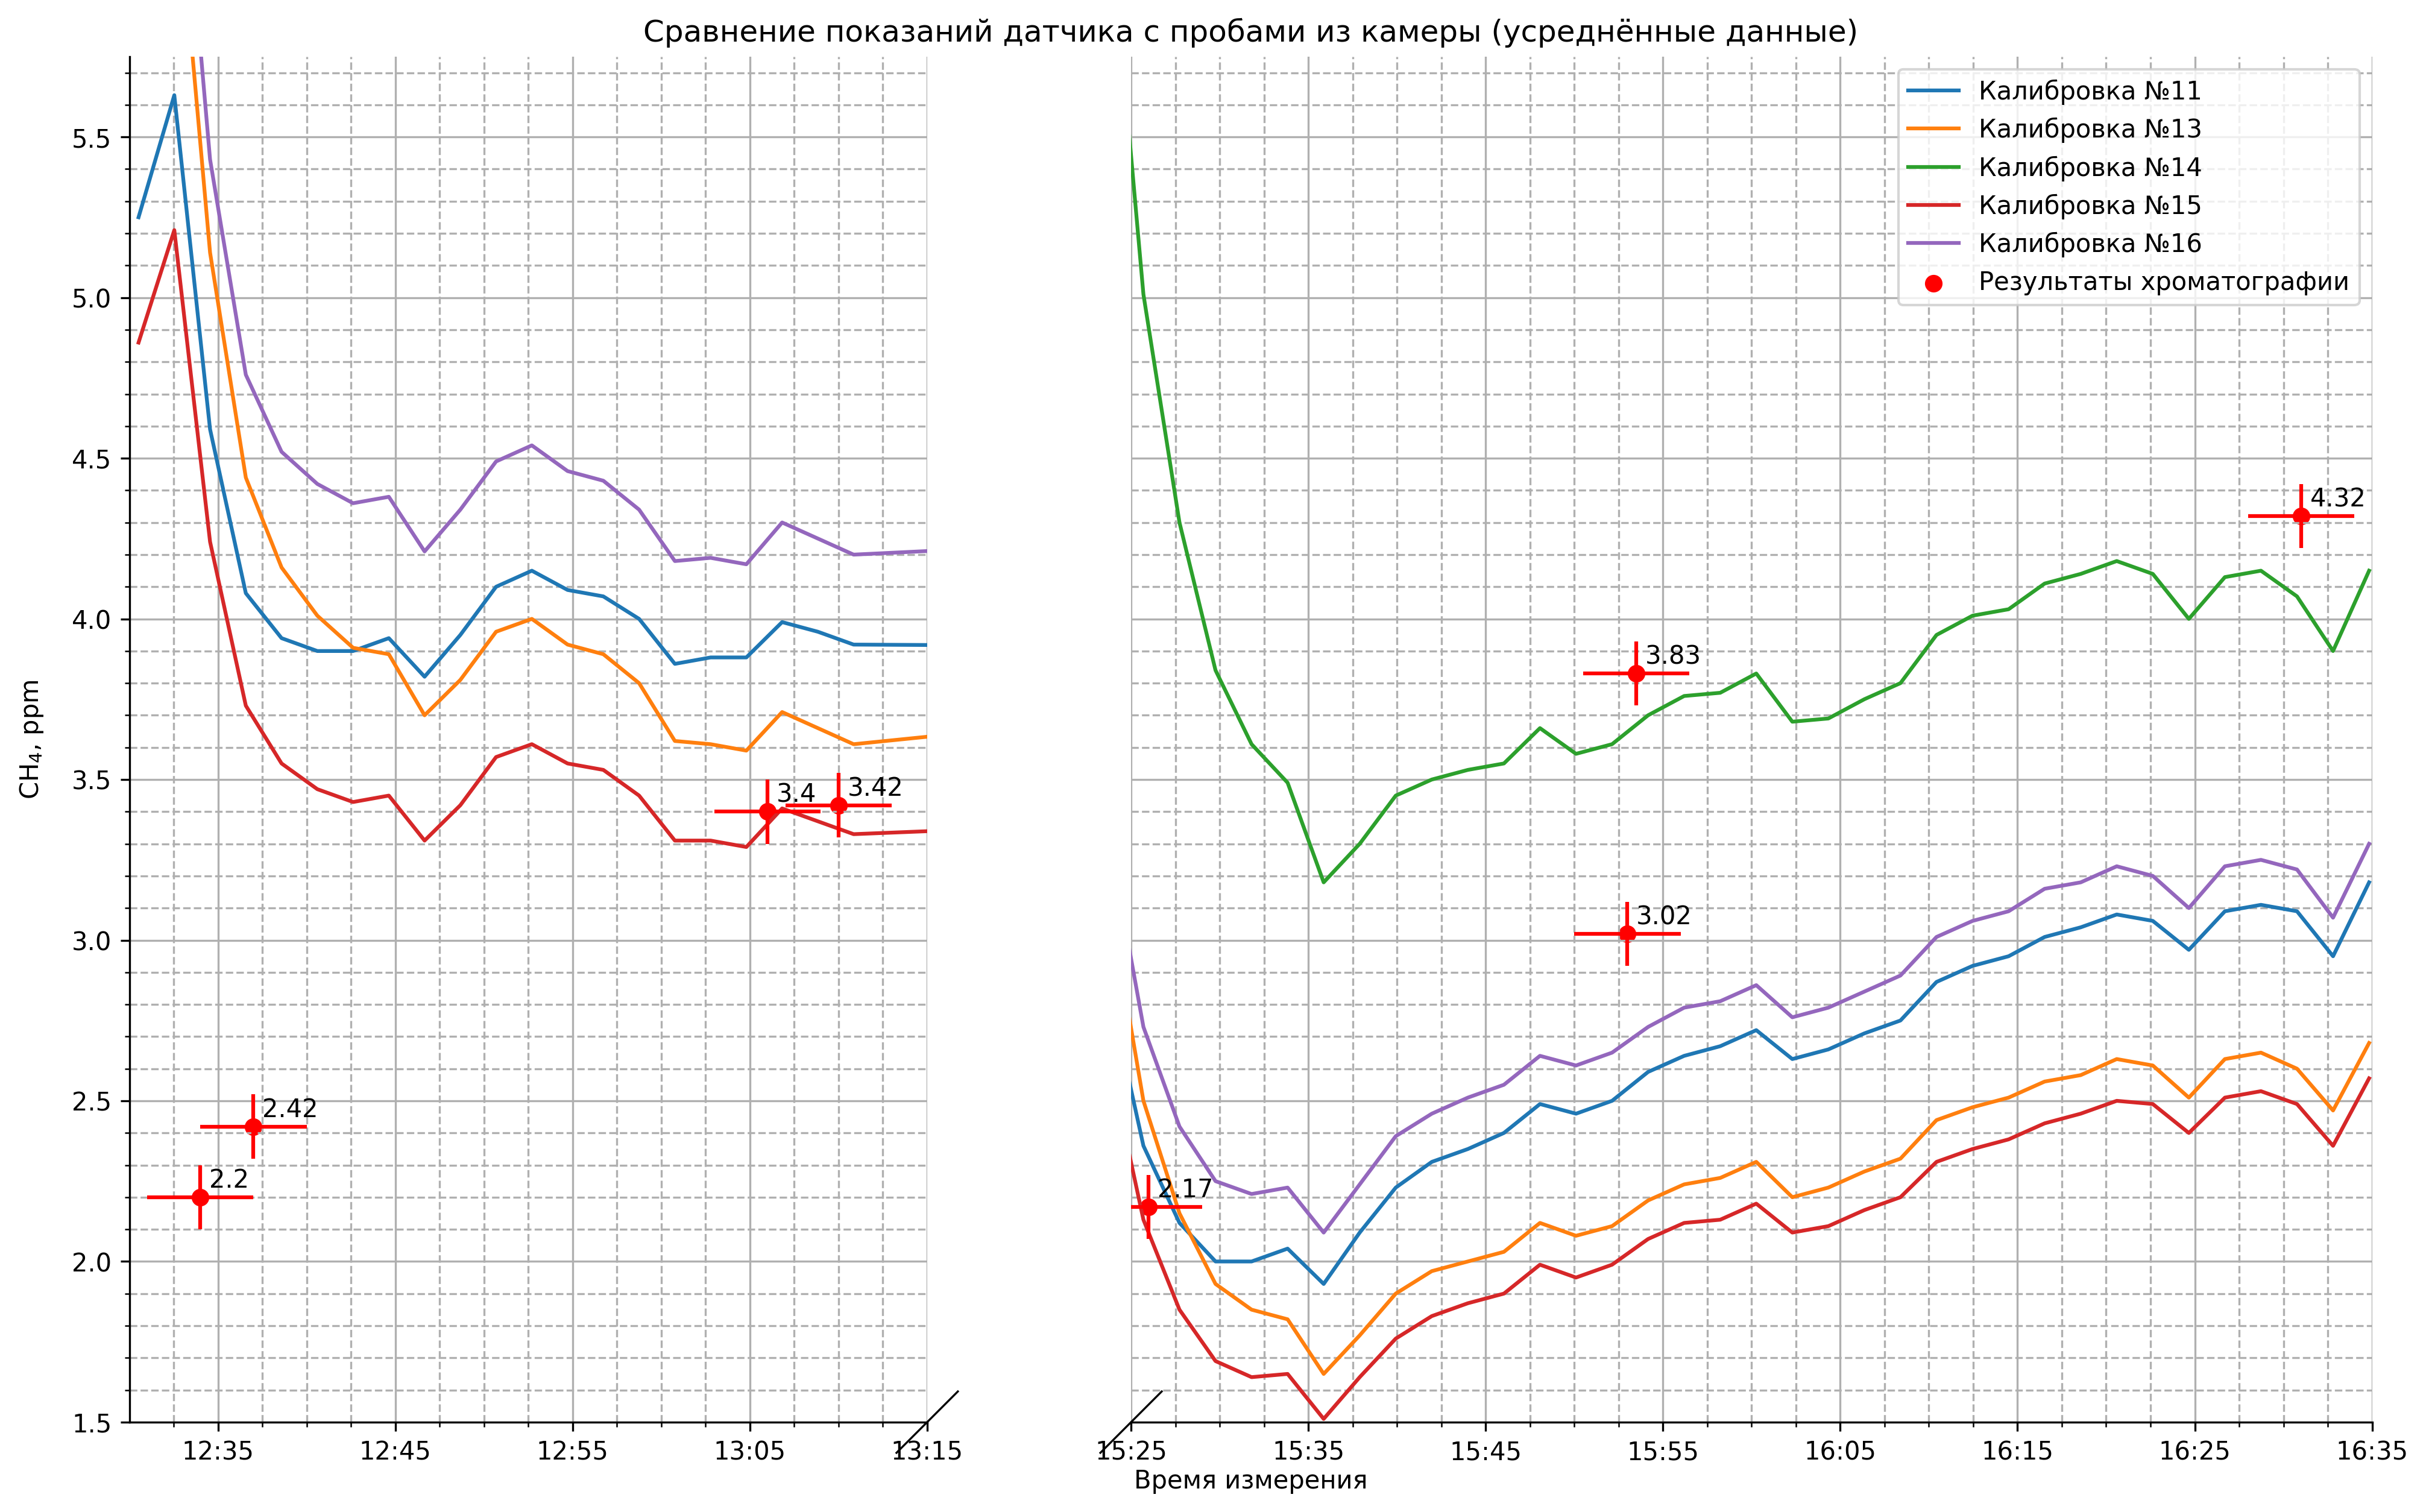

In [122]:
figure = plt.figure(figsize=(16,10), dpi = 300)
axis = brokenaxes(xlims=((min_time, end_first),(start_second,max_time))) #, ylims=((1.5, 7),(10, 13))
axis.set_title("Сравнение показаний датчика с пробами из камеры (усреднённые данные)")
# axis.set_title("Напряжение на сенсоре TGS-2611 во время полевых экспериментов")
axis.set_xlabel('Время измерения')
# axis.set_ylabel('V, В')
axis.set_ylabel('CH$_{4}$, ppm')
axis.set_ylim([1.5, 5.75])
for id in ids:
    pathTemplate = f"calculated_with_calibration{id}_*.csv"
    dataPath = glob.glob(pathTemplate)[-1]
    df = pd.read_csv(dataPath)
    df.timestamp = pd.to_datetime(df.timestamp)
    condition = ((min_time < df.timestamp) & ( df.timestamp < max_time))
    # Интересуемый временной промежуток
    # axis.scatter(df.timestamp[condition], df.V[condition])
    conditionStart = ((datetime(2022,6,28,15,35,0) < df.timestamp) & ( df.timestamp < datetime(2022,6,28,15,36,0)))
    conditionEnd = ((datetime(2022,6,28,16,32,0) < df.timestamp) & ( df.timestamp < datetime(2022,6,28,16,33,0)))
    axis.plot(df.timestamp[condition], df.CH4LR[condition], label =f"Калибровка №{id}")
    print(f"Калибровка №{id}: изменение концентрации = {df.CH4LR[conditionEnd].values} минус {df.CH4LR[conditionStart].values} = {df.CH4LR[conditionEnd].values-df.CH4LR[conditionStart].values}")
    # break
condition = (min_time < df_ref.timestamp) &  (df_ref.timestamp<  max_time)
axis.errorbar(df_ref.timestamp[condition], df_ref.CH4Ref[condition], xerr = timedelta(minutes=3), yerr = 0.1, fmt="None", color="r")
axis.scatter(df_ref.timestamp[condition], df_ref.CH4Ref[condition], label =f"Результаты хроматографии", c = 'r')
for i, txt in enumerate(y):
    axis.annotate(txt, (x[i]+timedelta(seconds=30), y[i]+0.03))
axis.legend()
axis.grid(which="major")
axis.grid(which="minor", linestyle="--")
axis.minorticks_on()
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
for ax in axis.axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.yaxis.set_major_locator(loc)